## Exploratory Data Analysis on Diwali Sales

### Problem Statement: Perfrom Analysis on  Data from aN E-commerce store with regards to the Diwali Sales.

## 1.Download the data
1.Find the appropriate data sets.

2.Make sure the data set informations are adequate.

3.Download the data

## 2. Data Preparation and Cleaning
1)Load the required data set using pandas.

2)Extract the required numerical informations.

3)Extract the categorical informations.

3)Fix the problems related with missing values, erros and other issues related with the data.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df=pd.read_csv(r'C:\Users\jaabir\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv',encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
 df.shape

(11251, 15)

In [10]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [11]:
df.shape

(11251, 13)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [13]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
df.duplicated().sum()

8

In [17]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(11243, 13)

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(11231, 13)

In [23]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [24]:
df['Amount']=df['Amount'].astype('int')

In [25]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [27]:
df.rename(columns={'Marital_Status':'MStatus'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,MStatus,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [28]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084676
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728074
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [32]:
df[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11231.000000,11231.000000,11231.000000
mean,35.411985,9454.084676,2.489093
std,12.756116,5221.728074,1.114880
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12677.500000,3.000000
max,92.000000,23952.000000,4.000000


## 3. Exploratory Data Analysis

### Order With respect to Gender

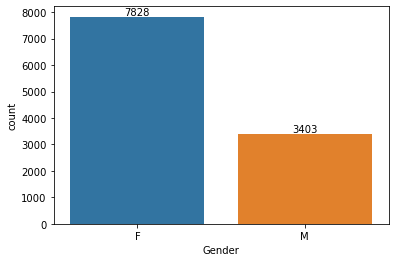

In [35]:
ax= sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

### Sales Amount With respect to Gender

In [37]:
sales_by_gender=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_by_gender

,Gender,Amount
0,F,74307679
1,M,31871146


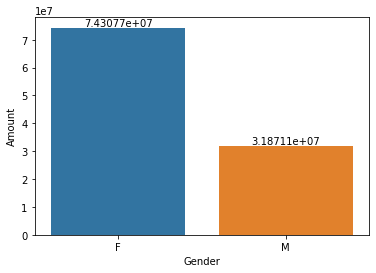

In [42]:
ax=sns.barplot(x='Gender',y='Amount',data=sales_by_gender)
for bars in ax.containers:
    ax.bar_label(bars)

### Order based on Age group

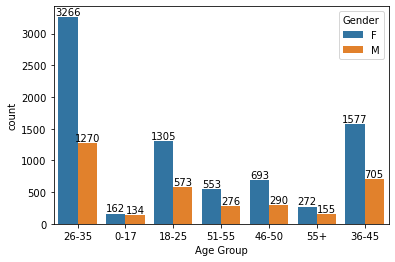

In [45]:
ax=sns.countplot(x='Age Group',hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

### Sales Amount based on Age Group

In [47]:
sales_by_agegroup=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount')
sales_by_agegroup

,Age Group,Amount
0,0-17,2699653
6,55+,4080987
5,51-55,8237909
4,46-50,9207844
1,18-25,17235530
3,36-45,22135135
2,26-35,42581767


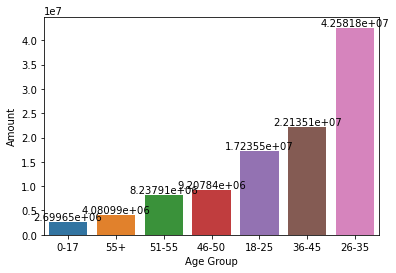

In [51]:
ax=sns.barplot(x='Age Group',y='Amount',data=sales_by_agegroup)
for bars in ax.containers:
    ax.bar_label(bars)

### Number of Orders With respect to State

In [61]:
states_by_order=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders')[:10]
states_by_order

,State,Orders
13,Telangana,312
11,Punjab,495
12,Rajasthan,555
15,Uttarakhand,824
6,Jharkhand,953
1,Bihar,1058
3,Gujarat,1063
4,Haryana,1106
8,Kerala,1137
5,Himachal Pradesh,1568


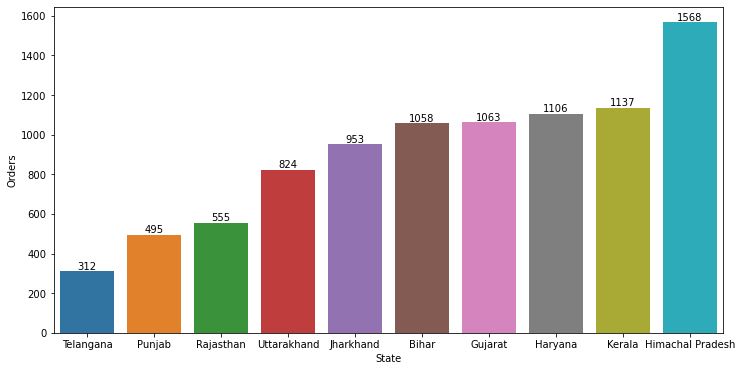

In [71]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x='State',y='Orders',data=states_by_order)
for bar in ax.containers:
    ax.bar_label(bar)
plt.show()

### States Based Sales

In [68]:
states_by_Amount=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount')[:10]
states_by_Amount

,State,Amount
13,Telangana,1151490
11,Punjab,1525800
12,Rajasthan,1909409
15,Uttarakhand,2520944
6,Jharkhand,3026456
8,Kerala,3894491
3,Gujarat,3938159
1,Bihar,4014669
4,Haryana,4217871
5,Himachal Pradesh,4963368


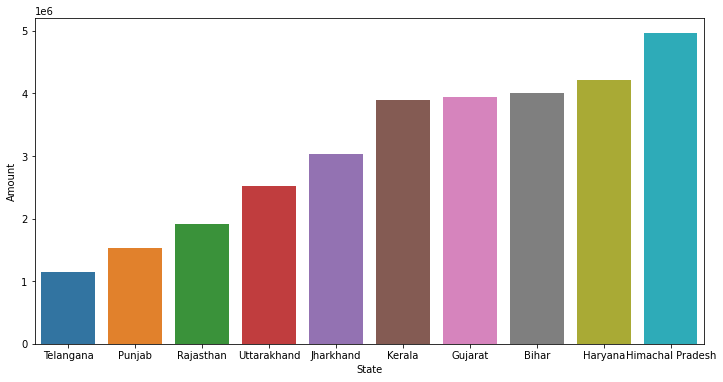

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x='State',y='Amount',data=states_by_Amount)
plt.show()

In [76]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Marital Status Statistics

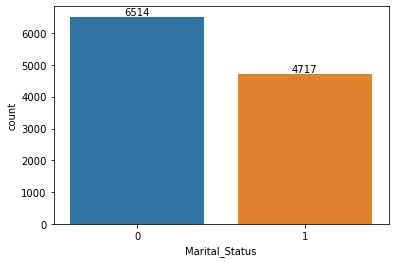

In [82]:
ax=sns.countplot(x='Marital_Status',data=df)
for bar in ax.containers:
    ax.bar_label(bar)

### Sales By Marital Status

In [79]:
sales_by_marital_status=df.groupby(['Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount')
sales_by_marital_status

,Marital_Status,Amount
1,1,44080091
0,0,62098734


<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

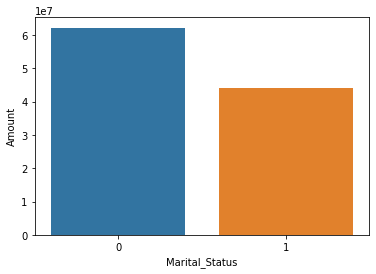

In [81]:
sns.barplot(x='Marital_Status',y='Amount',data=sales_by_marital_status)

### Analysis Based on Occupation

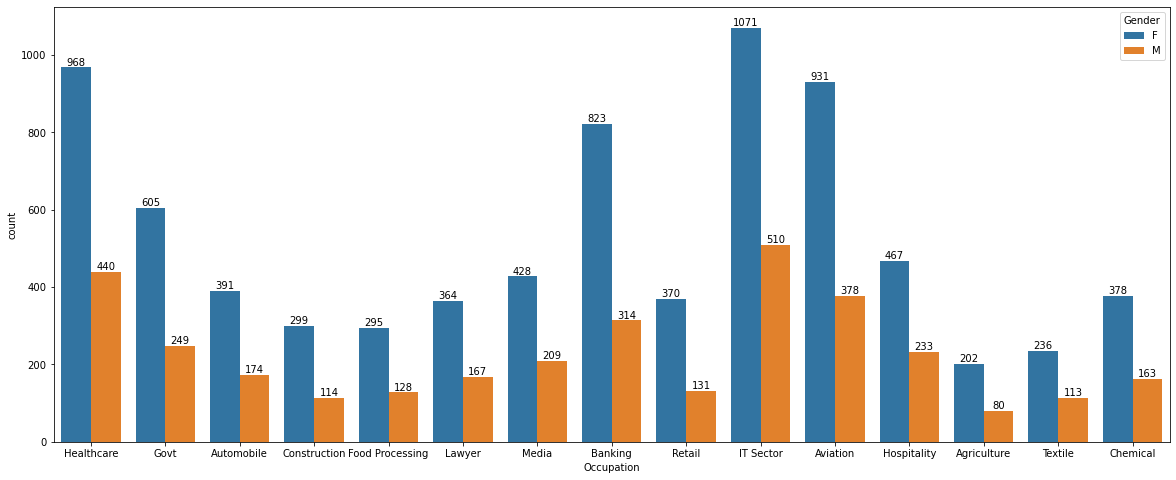

In [100]:
plt.figure(figsize=(20,8))
ax= sns.countplot(x='Occupation',hue='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [97]:
sales_by_occupation=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount')
sales_by_occupation

,Occupation,Amount
0,Agriculture,2584999
14,Textile,3204972
5,Construction,3589588
6,Food Processing,4070670
13,Retail,4783170
11,Lawyer,4981665
4,Chemical,5297436
1,Automobile,5368596
12,Media,6295832
9,Hospitality,6337633


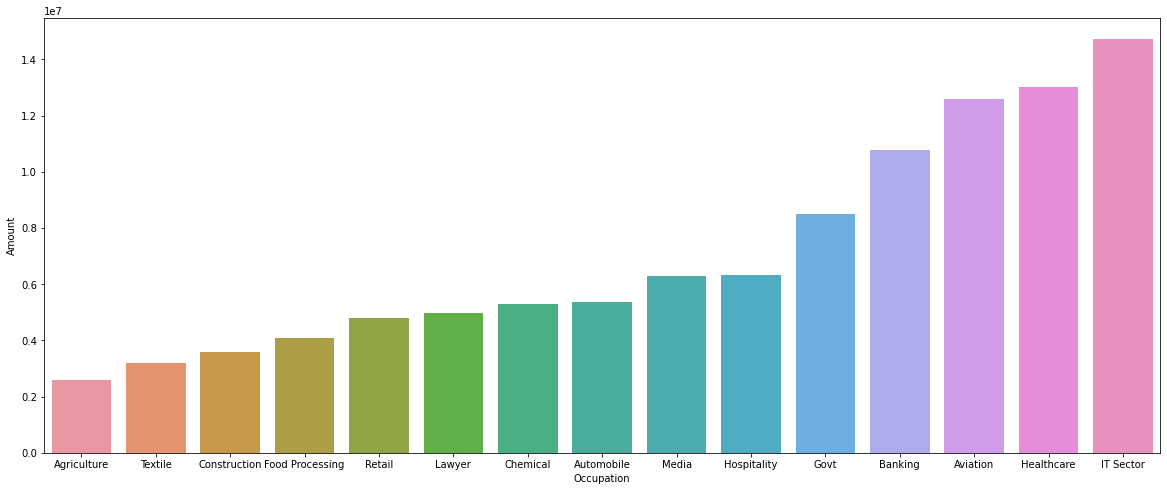

In [109]:

plt.figure(figsize=(20,8))
ax= sns.barplot(x='Occupation', y='Amount',data=sales_by_occupation)

plt.show()

### Analysis Based on Product Category

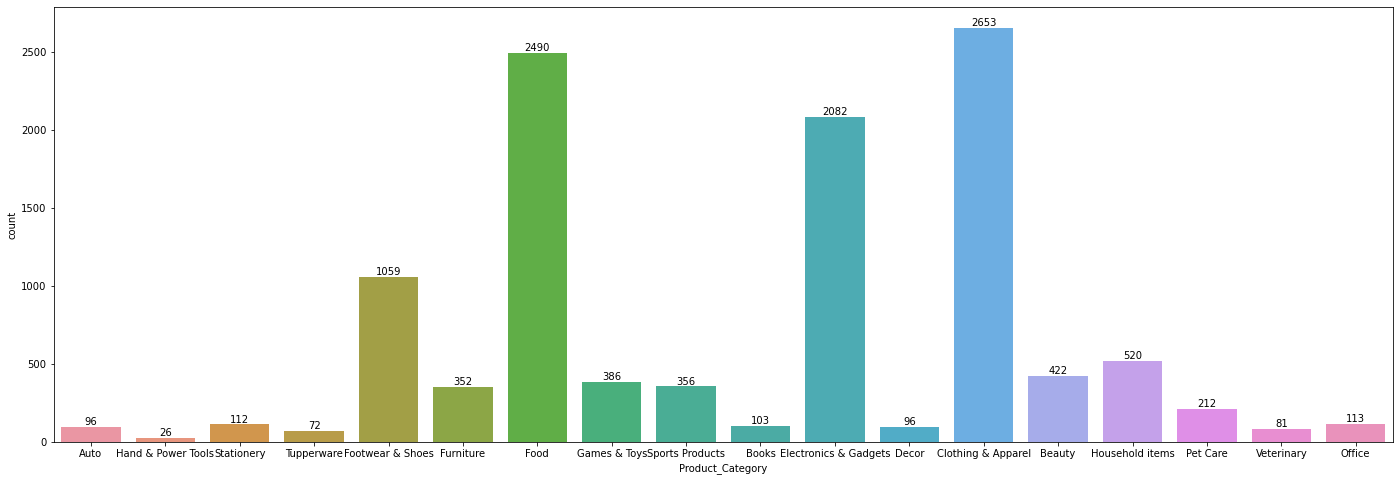

In [103]:
plt.figure(figsize=(24,8))

ax=sns.countplot(x='Product_Category',data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [105]:
sales_by_productcategory=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_by_productcategory

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16484472
5,Electronics & Gadgets,15607657
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1935041
15,Stationery,1676051


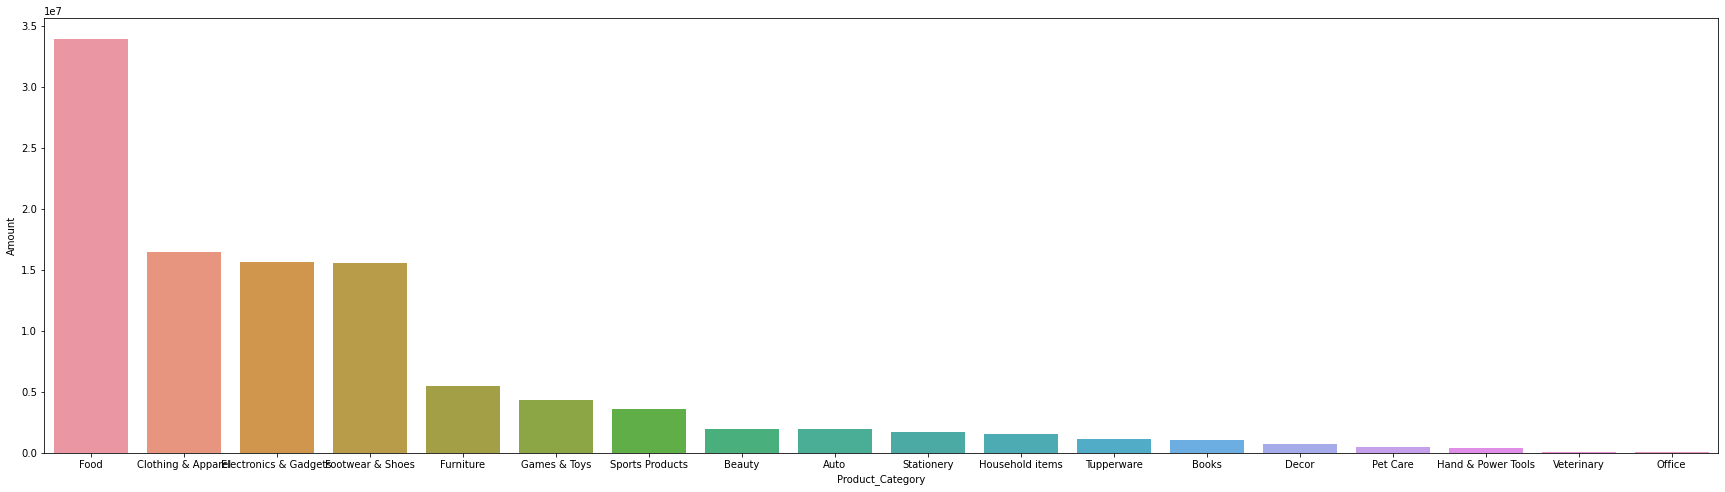

In [112]:
plt.figure(figsize=(30,8))

ax=sns.barplot(x='Product_Category',y='Amount',data=sales_by_productcategory)

plt.show()

In [108]:
product_by_ordered=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)[:10]
product_by_ordered

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
171,P00025442,79
679,P00114942,79
888,P00145042,76
708,P00117942,76
298,P00044442,75
643,P00110842,74


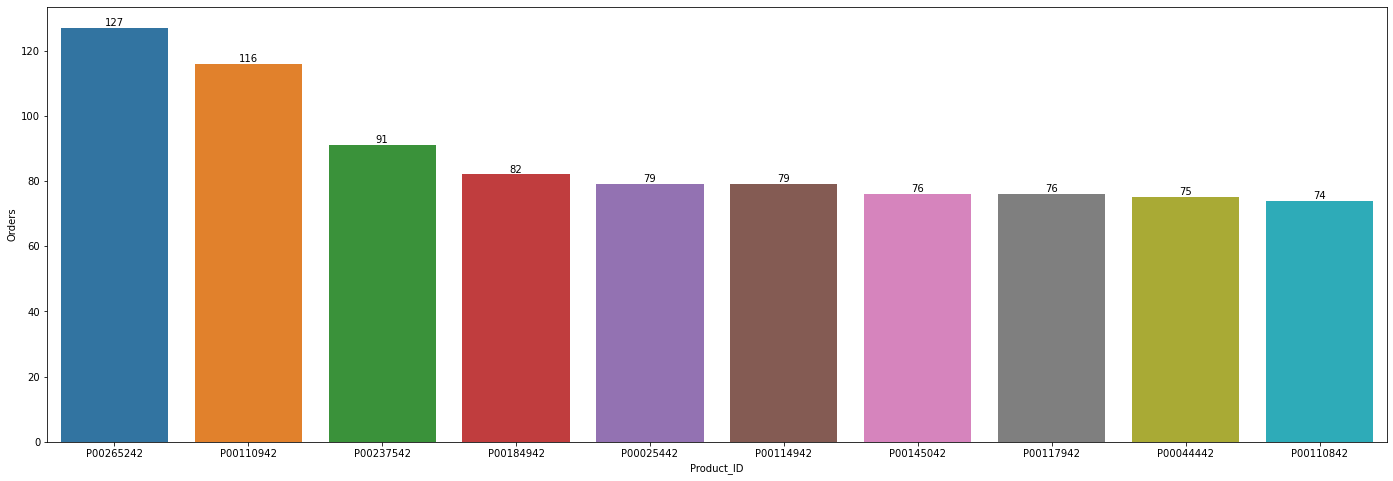

In [113]:
plt.figure(figsize=(24,8))

ax=sns.barplot(x='Product_ID',y='Orders',data=product_by_ordered)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [114]:
sales_by_prodct_id=df.groupby(['Product_ID'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)[:10]
sales_by_prodct_id

,Product_ID,Amount
1679,P00265242,540136
644,P00110942,424833
1146,P00184942,401816
654,P00112142,341020
396,P00059442,338571
1504,P00237542,322363
388,P00058042,307040
642,P00110742,294548
643,P00110842,290661
492,P00080342,283309


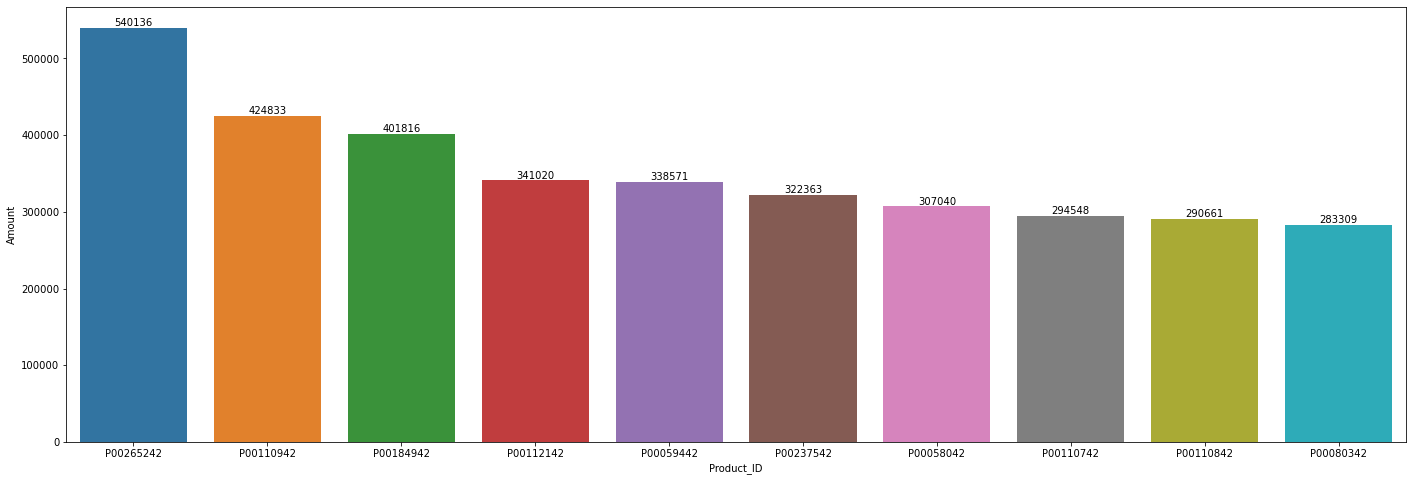

In [115]:
plt.figure(figsize=(24,8))

ax=sns.barplot(x='Product_ID',y='Amount',data=sales_by_prodct_id)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

## 4. Conclusion

. Ladies Shop More
. Most Revenue is generated from 26-35 age Group
. Unmarried people tend to shop more
. Most Revenue is generated from people working for IT sector